# Testing Geoparquet

In [20]:
# First things first, let's load some libraries
import geopandas as gpd
import geoparquet as gpq
import pyarrow as pa
import pyarrow.parquet as pq
import os
from IPython.display import display
from operator import itemgetter
from itertools import groupby
import sqlalchemy as db
from sqlalchemy import create_engine
import json
import pyproj

In [21]:
run ./magic.ipynb # define ROOT

In [ ]:
# read in file from shapefile or other format using geopandas
la_path = os.path.join(ROOT, "data", "la_boundaries_dec21_uk_bfc", "LAD_DEC_2021_UK_BFC.shp")
la_path_exists = os.path.exists(la_path)
print(la_path_exists)
gdf = gpd.read_file(la_path)
gdf = gdf.set_crs('epsg:27700')

In [27]:
%%capture
# Convert geopandas df to .geoparquet
export_path = os.path.join(ROOT, "la_boundaries_dec21.parquet")
export_path_feather = os.path.join(ROOT, "la_boundaries_dec21.feather")
gdf.to_parquet(export_path)
gdf.to_parquet(export_path_feather)

In [18]:
test_gdf = gpd.read_parquet(export_path)

<AxesSubplot:>

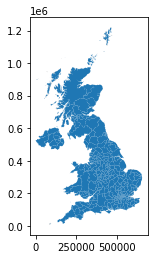

In [25]:
test_gdf.plot()